<a href="https://colab.research.google.com/github/cwtausif/Ai-Engineer-Master-Class/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Introductions

In [21]:
# Sample Data
data = [
    {
        "order_id": 1,
        "date": "2026-01-01",
        "time": "08:12",
        "customer_name": "Jessica",
        "item_name": "Latte",
        "price_usd": 5.25,
        "temperature_celsius": 17,
        "is_holiday": False,
        "is_promotion": True,
        "weather": "Cloudy"
    },
    {
        "order_id": 2,
        "date": "2026-01-01",
        "time": "18:05",
        "customer_name": "Robert",
        "item_name": "Americano",
        "price_usd": 300.50,
        "temperature_celsius": 19,
        "is_holiday": False,
        "is_promotion": True,
        "weather": "Rainy"
    },
    {
        "order_id": 3,
        "date": "2026-01-01",
        "time": "19:30",
        "customer_name": "Linda",
        "item_name": "Flat White",
        "price_usd": 4.75,
        "temperature_celsius": 18,
        "is_holiday": False,
        "is_promotion": False,
        "weather": "Rainy"
    },
    {
        "order_id": 4,
        "date": "2026-01-01",
        "time": "18:42",
        "customer_name": "Emily",
        "item_name": "Mocha",
        "price_usd": 5.75,
        "temperature_celsius": 16,
        "is_holiday": False,
        "is_promotion": False,
        "weather": "Foggy"
    },
    {
        "order_id": 5,
        "date": "2026-01-02",
        "time": "09:40",
        "customer_name": "David",
        "item_name": "Cold Brew",
        "price_usd": 4.50,
        "temperature_celsius": 10,
        "is_holiday": False,
        "is_promotion": False,
        "weather": "Cloudy"
    },
    {
        "order_id": 6,
        "date": "2026-01-02",
        "time": "11:52",
        "customer_name": "Anthony",
        "item_name": "Espresso",
        "price_usd": 3.00,
        "temperature_celsius": 11,
        "is_holiday": False,
        "is_promotion": False,
        "weather": "Cloudy"
    },
    {
        "order_id": 7,
        "date": "2026-01-03",
        "time": "14:20",
        "customer_name": "Unknown",
        "item_name": "Chai Latte",
        "price_usd": 4.25,
        "temperature_celsius": 9,
        "is_holiday": False,
        "is_promotion": True,
        "weather": "Humid"
    },
    {
        "order_id": 8,
        "date": "2026-01-03",
        "time": "15:05",
        "customer_name": "Robert",
        "item_name": "Cappuccino",
        "price_usd": 4.95,
        "temperature_celsius": -3,
        "is_holiday": False,
        "is_promotion": True,
        "weather": "Sunny"
    },
    {
        "order_id": 9,
        "date": "2026-01-04",
        "time": "08:58",
        "customer_name": "Karen",
        "item_name": "Hot Chocolate",
        "price_usd": 3.95,
        "temperature_celsius": 22,
        "is_holiday": True,
        "is_promotion": False,
        "weather": "Sunny"
    },
    {
        "order_id": 10,
        "date": "2026-01-04",
        "time": "12:15",
        "customer_name": "Jessica",
        "item_name": "Flat White",
        "price_usd": 0,
        "temperature_celsius": 67,
        "is_holiday": True,
        "is_promotion": False,
        "weather": "Sun"
    }
]

### Load Data in a DataFrame

In [22]:
import pandas as pd

df = pd.DataFrame(data, columns=[
    "order_id",
    "date",
    "time",
    "customer_name",
    "item_name",
    "price_usd",
    "temperature_celsius",
    "is_holiday",
    "is_promotion",
    "weather"
])

df

,order_id,date,time,customer_name,item_name,price_usd,temperature_celsius,is_holiday,is_promotion,weather
0,1,2026-01-01,08:12,Jessica,Latte,5.25,17,False,True,Cloudy
1,2,2026-01-01,18:05,Robert,Americano,300.50,19,False,True,Rainy
2,3,2026-01-01,19:30,Linda,Flat White,4.75,18,False,False,Rainy
3,4,2026-01-01,18:42,Emily,Mocha,5.75,16,False,False,Foggy
4,5,2026-01-02,09:40,David,Cold Brew,4.50,10,False,False,Cloudy
5,6,2026-01-02,11:52,Anthony,Espresso,3.00,11,False,False,Cloudy
6,7,2026-01-03,14:20,Unknown,Chai Latte,4.25,9,False,True,Humid
7,8,2026-01-03,15:05,Robert,Cappuccino,4.95,-3,False,True,Sunny
8,9,2026-01-04,08:58,Karen,Hot Chocolate,3.95,22,True,False,Sunny
9,10,2026-01-04,12:15,Jessica,Flat White,0.00,67,True,False,Sun


### **EDA**

## 1. Understand basic structure (rows, columns, dtypes)

In [23]:
# See first few rows
df.head()

,order_id,date,time,customer_name,item_name,price_usd,temperature_celsius,is_holiday,is_promotion,weather
0,1,2026-01-01,08:12,Jessica,Latte,5.25,17,False,True,Cloudy
1,2,2026-01-01,18:05,Robert,Americano,300.50,19,False,True,Rainy
2,3,2026-01-01,19:30,Linda,Flat White,4.75,18,False,False,Rainy
3,4,2026-01-01,18:42,Emily,Mocha,5.75,16,False,False,Foggy
4,5,2026-01-02,09:40,David,Cold Brew,4.50,10,False,False,Cloudy


In [24]:
# Shape of data
df.shape  # (rows, columns)

(10, 10)

In [25]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             10 non-null     int64  
 1   date                 10 non-null     object 
 2   time                 10 non-null     object 
 3   customer_name        10 non-null     object 
 4   item_name            10 non-null     object 
 5   price_usd            10 non-null     float64
 6   temperature_celsius  10 non-null     int64  
 7   is_holiday           10 non-null     bool   
 8   is_promotion         10 non-null     bool   
 9   weather              10 non-null     object 
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 792.0+ bytes


### 2. Check missing values and duplicates

In [26]:
# Missing values per column
df.isnull().sum()

,0
order_id,0
date,0
time,0
customer_name,0
item_name,0
price_usd,0
temperature_celsius,0
is_holiday,0
is_promotion,0
weather,0


In [27]:
# Percentage of missing values
(df.isnull().mean() * 100).round(2)

,0
order_id,0.0
date,0.0
time,0.0
customer_name,0.0
item_name,0.0
price_usd,0.0
temperature_celsius,0.0
is_holiday,0.0
is_promotion,0.0
weather,0.0


In [28]:
# Duplicate rows
df.duplicated().sum()

np.int64(0)

### 3. Summary statistics for numeric columns

In [29]:
# Summary for numeric columns
df.describe()

,order_id,price_usd,temperature_celsius
count,10.00000,10.000000,10.000000
mean,5.50000,33.690000,18.600000
std,3.02765,93.761336,18.422209
min,1.00000,0.000000,-3.000000
25%,3.25000,4.025000,10.250000
50%,5.50000,4.625000,16.500000
75%,7.75000,5.175000,18.750000
max,10.00000,300.500000,67.000000


If you want to be specific:

In [30]:
df[["price_usd", "temperature_celsius"]].describe()

,price_usd,temperature_celsius
count,10.000000,10.000000
mean,33.690000,18.600000
std,93.761336,18.422209
min,0.000000,-3.000000
25%,4.025000,10.250000
50%,4.625000,16.500000
75%,5.175000,18.750000
max,300.500000,67.000000


### 4. Distributions of key columns

<Axes: >

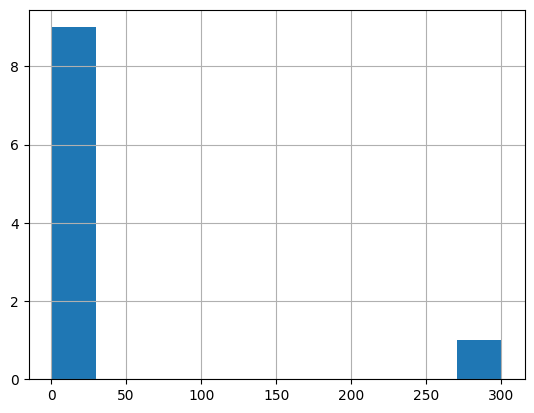

In [31]:
df["price_usd"].value_counts()  # for your small sample
# or for bigger data:
df["price_usd"].hist()

### Categorical example: items ordered



In [32]:
df["item_name"].value_counts()

,count
item_name,
Flat White,2
Latte,1
Americano,1
Mocha,1
Cold Brew,1
Espresso,1
Chai Latte,1
Cappuccino,1
Hot Chocolate,1


### 5. Simple relationships (groupby)

In [33]:
# Example A: total revenue per day
df.groupby("date")["price_usd"].sum()

,price_usd
date,
2026-01-01,316.25
2026-01-02,7.50
2026-01-03,9.20
2026-01-04,3.95


In [34]:
# Example B: average order price by item
df.groupby("item_name")["price_usd"].mean()

,price_usd
item_name,
Americano,300.500
Cappuccino,4.950
Chai Latte,4.250
Cold Brew,4.500
Espresso,3.000
Flat White,2.375
Hot Chocolate,3.950
Latte,5.250
Mocha,5.750


In [35]:
# Example C: orders on holiday vs non-holiday
df.groupby("is_holiday")["order_id"].count()
# or if you don’t have order_id, use df.shape[0] in groups:
df.groupby("is_holiday").size()

,0
is_holiday,
False,8
True,2


### Plot a simple graph

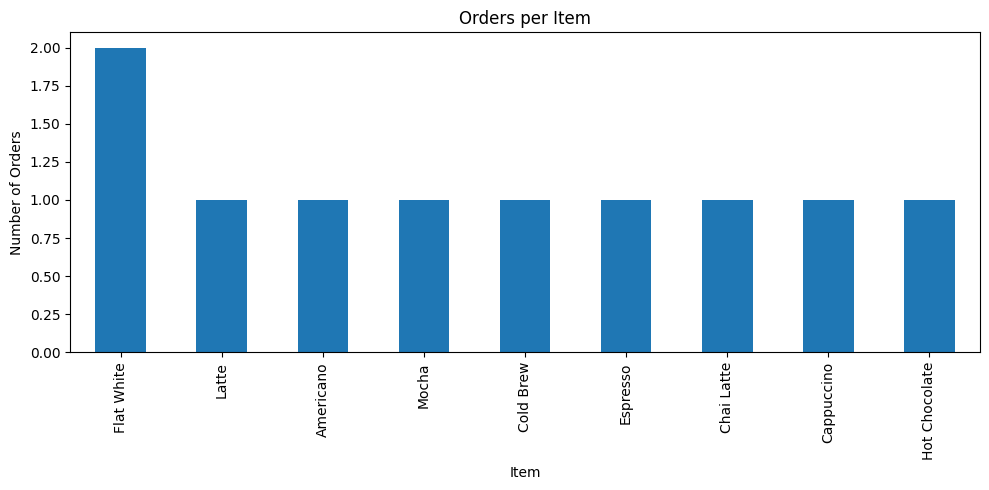

In [37]:
# Example: Number of orders per item

import matplotlib.pyplot as plt

df["item_name"].value_counts().plot(kind="bar", figsize=(10,5))

plt.title("Orders per Item")
plt.xlabel("Item")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()